In [1]:
import geopandas as gpd
import os

In [5]:
pipelines = gpd.read_file("data/pipelines_105.geojson")
pipelines.head()

,location,diameter (mm),material,length (m),category,geometry
0,"Rowshon Goly,Bagpara,South Rajarbagh",75,HDPE,29.345685,Reticulation Pipeline,"LINESTRING (90.4394 23.73563, 90.43932 23.7356..."
1,"Jora Mosjid Main Rd-1,South Rajarbagh",75,HDPE,19.600000,Reticulation Pipeline,"LINESTRING (90.4418 23.73583, 90.4418 23.7359,..."
2,"Basabo-Rajarbagh Main Rd,South Rajarbagh",315,HDPE,18.625808,Transmission Pipeline,"LINESTRING (90.43919 23.73728, 90.43904 23.737..."
3,"New Road,South Rajarbagh",250,HDPE,13.453152,Transmission Pipeline,"LINESTRING (90.43912 23.73664, 90.4391 23.7366..."
4,"Bag Para Dorbar Rd-11,South Rajarbagh",110,HDPE,40.300000,Distribution Pipeline,"LINESTRING (90.43944 23.73503, 90.43933 23.735..."


In [6]:
pipelines.columns

Index(['location', 'diameter (mm)', 'material', 'length (m)', 'category',
       'geometry'],
      dtype='str')

In [7]:
pipelines.index

RangeIndex(start=0, stop=799, step=1)

In [8]:
pipelines.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [9]:
pipelines.shape

(799, 6)

In [10]:
pipelines_filtered = pipelines[["location", "category", "geometry"]]
pipelines_filtered.head()

,location,category,geometry
0,"Rowshon Goly,Bagpara,South Rajarbagh",Reticulation Pipeline,"LINESTRING (90.4394 23.73563, 90.43932 23.7356..."
1,"Jora Mosjid Main Rd-1,South Rajarbagh",Reticulation Pipeline,"LINESTRING (90.4418 23.73583, 90.4418 23.7359,..."
2,"Basabo-Rajarbagh Main Rd,South Rajarbagh",Transmission Pipeline,"LINESTRING (90.43919 23.73728, 90.43904 23.737..."
3,"New Road,South Rajarbagh",Transmission Pipeline,"LINESTRING (90.43912 23.73664, 90.4391 23.7366..."
4,"Bag Para Dorbar Rd-11,South Rajarbagh",Distribution Pipeline,"LINESTRING (90.43944 23.73503, 90.43933 23.735..."


In [11]:
pipelines.head(10)

,location,diameter (mm),material,length (m),category,geometry
0,"Rowshon Goly,Bagpara,South Rajarbagh",75,HDPE,29.345685,Reticulation Pipeline,"LINESTRING (90.4394 23.73563, 90.43932 23.7356..."
1,"Jora Mosjid Main Rd-1,South Rajarbagh",75,HDPE,19.600000,Reticulation Pipeline,"LINESTRING (90.4418 23.73583, 90.4418 23.7359,..."
2,"Basabo-Rajarbagh Main Rd,South Rajarbagh",315,HDPE,18.625808,Transmission Pipeline,"LINESTRING (90.43919 23.73728, 90.43904 23.737..."
3,"New Road,South Rajarbagh",250,HDPE,13.453152,Transmission Pipeline,"LINESTRING (90.43912 23.73664, 90.4391 23.7366..."
4,"Bag Para Dorbar Rd-11,South Rajarbagh",110,HDPE,40.300000,Distribution Pipeline,"LINESTRING (90.43944 23.73503, 90.43933 23.735..."
5,"Istran Garde Main Road,South Rajarbagh",110,HDPE,1.968780,Distribution Pipeline,"LINESTRING (90.44197 23.73487, 90.44197 23.734..."
6,"Basabo-Kodomtola Main Rd,East Basabo",355,HDPE,1.971420,Transmission Pipeline,"LINESTRING (90.4366 23.73766, 90.43662 23.73765)"
7,"9 No Hirajhil Road,Kodomtola",110,HDPE,2.976710,Distribution Pipeline,"LINESTRING (90.43623 23.73468, 90.43623 23.73465)"
8,"9 No Kodomtola Ln,Kodomtola",75,HDPE,7.319093,Reticulation Pipeline,"LINESTRING (90.43705 23.73749, 90.43704 23.737..."
9,"East Basabo Goly,Kodomtola",75,HDPE,23.300000,Reticulation Pipeline,"LINESTRING (90.43788 23.7367, 90.43796 23.7367..."


In [17]:
pipelines.loc[0, 'length (m)']

np.float64(29.345685)

In [18]:
pipelines.tail(10)

,location,diameter (mm),material,length (m),category,geometry
789,"Jora Mosjid Main Rd-6,South Rajarbagh",160,HDPE,82.837417,Distribution Pipeline,"LINESTRING (90.4414 23.73582, 90.44141 23.7357..."
790,"2 No Kusumbagh Goly,Kusumbagh",110,HDPE,86.400008,Distribution Pipeline,"LINESTRING (90.44491 23.73886, 90.44493 23.738..."
791,"Huqe Residential Society Rd,South Rajarbagh",110,HDPE,92.800000,Distribution Pipeline,"LINESTRING (90.43769 23.73436, 90.43769 23.734..."
792,"Dokhingaon Main Road,Dokhingaon",250,HDPE,134.512988,Transmission Pipeline,"LINESTRING (90.44653 23.73882, 90.44657 23.738..."
793,"Kusumbagh Road,Dokhingaon",160,HDPE,156.499952,Distribution Pipeline,"LINESTRING (90.44652 23.73882, 90.44653 23.738..."
794,"Khalpar Jirani Road,East Basabo",110,HDPE,46.854883,Distribution Pipeline,"LINESTRING (90.43899 23.73739, 90.43906 23.737..."
795,"Dampara Rd-5,South Rajarbagh",75,HDPE,26.400000,Reticulation Pipeline,"LINESTRING (90.44151 23.73501, 90.44142 23.735..."
796,"Commissioner Goly Ln-3,Rajarbagh",110,HDPE,28.000000,Distribution Pipeline,"LINESTRING (90.44138 23.73886, 90.44146 23.738..."
797,"Bank Quarter Rd -2,South Rajarbagh",75,HDPE,77.899997,Reticulation Pipeline,"LINESTRING (90.44234 23.7375, 90.44243 23.7375..."
798,"1 No Kusumbagh Bondhon Rd-10,Kusumbagh",110,HDPE,11.238891,Distribution Pipeline,"LINESTRING (90.44516 23.73544, 90.44516 23.735..."


In [19]:
#multiple rows and columns
pipelines.iloc[[791, 793, 797], [0, 4]]

,location,category
791,"Huqe Residential Society Rd,South Rajarbagh",Distribution Pipeline
793,"Kusumbagh Road,Dokhingaon",Distribution Pipeline
797,"Bank Quarter Rd -2,South Rajarbagh",Reticulation Pipeline


In [20]:
#range
pipelines.iloc[790:795, 0:4]

,location,diameter (mm),material,length (m)
790,"2 No Kusumbagh Goly,Kusumbagh",110,HDPE,86.400008
791,"Huqe Residential Society Rd,South Rajarbagh",110,HDPE,92.800000
792,"Dokhingaon Main Road,Dokhingaon",250,HDPE,134.512988
793,"Kusumbagh Road,Dokhingaon",160,HDPE,156.499952
794,"Khalpar Jirani Road,East Basabo",110,HDPE,46.854883


In [22]:
pipelines.to_crs(epsg=32646, inplace=True) #pyproj

pipelines['length'] = pipelines['geometry'].length
pipelines['area'] = pipelines['geometry'].area
pipelines['buffer'] = pipelines['geometry'].buffer(2)
pipelines['centroid'] = pipelines['geometry'].centroid

In [23]:
pipelines.set_geometry('centroid', inplace=True)

<Axes: >

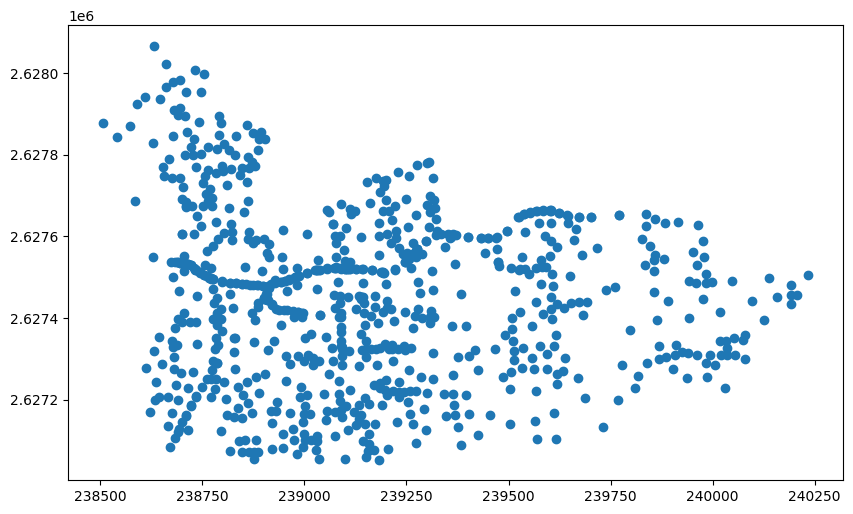

In [24]:
pipelines.plot(figsize = [10,10])

In [25]:
gdf = gpd.read_file("data/buildings_105.shp")
gdf.head()

,category,storey,population,geometry
0,Tin Shed,1,20,"POLYGON ((90.43983 23.73404, 90.43983 23.734, ..."
1,Open Plot,0,0,"POLYGON ((90.44807 23.73679, 90.44797 23.73679..."
2,Building,5,60,"POLYGON ((90.44906 23.73798, 90.44894 23.73797..."
3,Building,2,18,"POLYGON ((90.44108 23.73912, 90.44114 23.73915..."
4,Open Plot,0,0,"POLYGON ((90.44817 23.73688, 90.44824 23.73689..."


In [26]:
gdf["category"].unique()

<StringArray>
[          'Tin Shed',          'Open Plot',           'Building',
          'semi paka', 'Under Construction',           'building',
               '#N/A',           'tin shed']
Length: 8, dtype: str

In [27]:
for index, row in gdf.iterrows():
    if row['category'] == 'semi paka':
        gdf.at[index, 'category'] = 'Under Construction'

    if row['category'] == 'building':
        gdf.at[index, 'category'] = 'Building'

    if row['category'] == 'tin shed':
        gdf.at[index, 'category'] = 'Tin Shed'

In [28]:
gdf['category'].unique()

<StringArray>
['Tin Shed', 'Open Plot', 'Building', 'Under Construction', '#N/A']
Length: 5, dtype: str

In [29]:
gdf_dissolve = gdf.dissolve(by='category')
gdf_dissolve.head()

,geometry,storey,population
category,,,
#N/A,"MULTIPOLYGON (((90.43987 23.73381, 90.43984 23...",0,0
Building,"MULTIPOLYGON (((90.43653 23.73333, 90.43654 23...",5,60
Open Plot,"MULTIPOLYGON (((90.44134 23.73335, 90.44131 23...",0,0
Tin Shed,"MULTIPOLYGON (((90.43654 23.73345, 90.43653 23...",1,20
Under Construction,"MULTIPOLYGON (((90.43952 23.73347, 90.43949 23...",1,16


In [30]:
gdf_dissolve.shape

(5, 3)